### 4. 검정과 유의확률

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

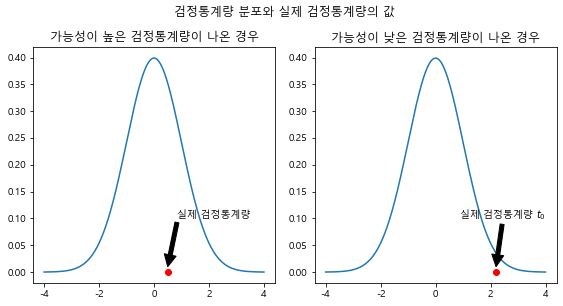

In [3]:
xx1 = np.linspace(-4, 4, 400)

black = {"facecolor": "black"}
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("가능성이 높은 검정통계량이 나온 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.annotate('실제 검정통계량', xy=(0.5, 0.01), xytext=(0.85, 0.1), arrowprops=black)

plt.subplot(122)
plt.title("가능성이 낮은 검정통계량이 나온 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(2.2, 0.01), xytext=(0.85, 0.1), arrowprops=black)

plt.suptitle("검정통계량 분포와 실제 검정통계량의 값", y=1.05)
plt.tight_layout()
plt.show()

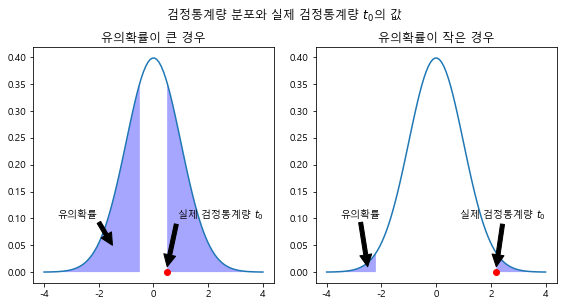

In [4]:
xx1 = np.linspace(-4, 4, 100)

black = {"facecolor": "black"}
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("유의확률이 큰 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(0.5, 0.01), xytext=(0.85, 0.1), arrowprops=black)
xx2 = np.linspace(-4, -0.5, 100)
xx3 = np.linspace(0.5, 4, 100)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.annotate('유의확률', xy=(-1.5, 0.05), xytext=(-3.5, 0.1), arrowprops=black)

plt.subplot(122)
plt.title("유의확률이 작은 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(2.2, 0.01), xytext=(0.85, 0.1), arrowprops=black)
xx2 = np.linspace(-4, -2.2, 100)
xx3 = np.linspace(2.2, 4, 100)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.annotate('유의확률', xy=(-2.5, 0.01), xytext=(-3.5, 0.1), arrowprops=black)

plt.suptitle("검정통계량 분포와 실제 검정통계량 $t_0$의 값", y=1.05)
plt.tight_layout()
plt.show()

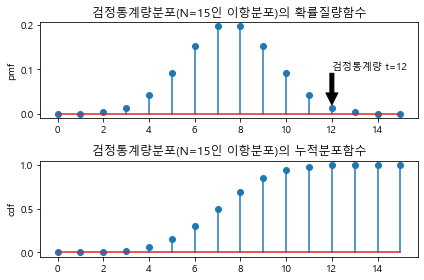

In [5]:
# 어떤 동전을 15번 던졌더니 12번이 앞면이 나왔다.
# 이 동전은 조작되지 않은 공정한 동전이라고 할 수 있는가?
N = 15
mu = 0.5
rv = sp.stats.binom(N, mu)

xx = np.arange(N + 1)

plt.subplot(211)
plt.stem(xx, rv.pmf(xx))
plt.ylabel("pmf")
plt.title("검정통계량분포(N=15인 이항분포)의 확률질량함수")
black = {"facecolor": "black"}
plt.annotate('검정통계량 t=12', xy=(12, 0.02), xytext=(12, 0.1), arrowprops=black)

plt.subplot(212)
plt.stem(xx, rv.cdf(xx))
plt.ylabel("cdf")
plt.title("검정통계량분포(N=15인 이항분포)의 누적분포함수")

plt.tight_layout()
plt.show()

In [6]:
2 * (1 - rv.cdf(12 - 1))

0.03515625

In [7]:
# 주가 수익률
x = np.array([-0.025, -0.05, 0.043, -0.037, -0.056])
t = x.mean()/x.std(ddof=1)*np.sqrt(len(x))
t

-1.4025921414082105

In [8]:
sp.stats.t(df=4).cdf(t)

0.11669216509589829

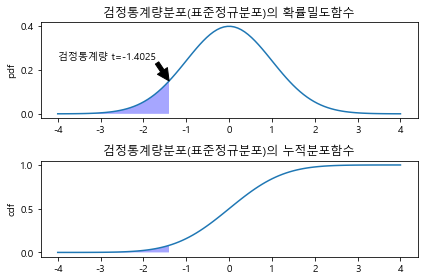

In [9]:
rv = sp.stats.norm()

xx = np.linspace(-4, 4, 100)

plt.subplot(211)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("pdf")
plt.title("검정통계량분포(표준정규분포)의 확률밀도함수")
black = {"facecolor": "black"}
plt.annotate('검정통계량 t=-1.4025', xy=(-1.4, 0.15), xytext=(-4, 0.25), arrowprops=black)
xx2 = np.linspace(-4, -1.4025, 100)
plt.fill_between(xx2, rv.pdf(xx2), facecolor='blue', alpha=0.35)

plt.subplot(212)
plt.plot(xx, rv.cdf(xx))
plt.fill_between(xx2, rv.cdf(xx2), facecolor='blue', alpha=0.35)
plt.ylabel("cdf")
plt.title("검정통계량분포(표준정규분포)의 누적분포함수")

plt.tight_layout()
plt.show()

In [10]:
# 연습 문제 9.4.3
N, mu = 20, 0.5
rv = sp.stats.binom(N, mu)
1 - rv.cdf(11 - 1)          # 좋아요가 더 많은 한쪽 검정

0.4119014739990232

### 5. 사이파이를 이용한 검정

- 이항 검정

In [11]:
sp.stats.binom_test(11, N, alternative='greater')

0.41190147399902316

In [12]:
# μ0=0.35 인 경우에 대해 시뮬레이션을 했더니 1이 100번 중 31번 나왔다.
sp.stats.binom_test(31, 100)

0.00018314322488235352

In [13]:
# 연습 문제 9.5.1
N = 10
for i in range(1, 10):
    p_val = sp.stats.binom_test(i, N)
    print(f'동전 앞면이 나온 횟수: {i}, p-value: {p_val}')

동전 앞면이 나온 횟수: 1, p-value: 0.021484374999999997
동전 앞면이 나온 횟수: 2, p-value: 0.10937500000000003
동전 앞면이 나온 횟수: 3, p-value: 0.3437499999999999
동전 앞면이 나온 횟수: 4, p-value: 0.7539062500000002
동전 앞면이 나온 횟수: 5, p-value: 1.0
동전 앞면이 나온 횟수: 6, p-value: 0.7539062500000002
동전 앞면이 나온 횟수: 7, p-value: 0.3437499999999999
동전 앞면이 나온 횟수: 8, p-value: 0.10937500000000003
동전 앞면이 나온 횟수: 9, p-value: 0.021484374999999997


In [14]:
for i in range(1,1000):
    p_val = sp.stats.binom_test(i, 1000)
    if p_val > 0.1:
        print(i)
        break

474


In [15]:
(526 - 474 + 1) / 1001 * 100

5.294705294705294

In [16]:
# 연습 문제 9.5.2
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [17]:
df = tips[tips.sex == 'Female']
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4


In [18]:
N = len(df)
df.smoker.value_counts()

No     54
Yes    33
Name: smoker, dtype: int64

In [19]:
sp.stats.binom_test(54, N, alternative='greater')

0.015709055116923068

In [20]:
ndf = df[df.time == 'Dinner']
ndf.smoker.value_counts()

No     29
Yes    23
Name: smoker, dtype: int64

In [21]:
sp.stats.binom_test(29, 52, alternative='greater')

0.2442278346899461

In [22]:
# 연습 문제 9.5.3
sp.stats.binom_test(70, 100, p=2/3., alternative='greater')

0.2765538515865939

In [23]:
for n in range(100, 10000000):
    p_val = sp.stats.binom_test(0.7 * n, n, p=2/3., alternative='greater')
    if p_val < 0.01:
        print(n)
        break

1100


- 카이제곱 검정

In [24]:
N = 10
K = 4
mu_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2], dtype=int64)

In [25]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

- 1-sample t 검정

In [53]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)

In [54]:
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [55]:
sp.stats.shapiro(x)

(0.9644963145256042, 0.8356637358665466)

In [28]:
N = 1000
mu = 0
np.random.seed(0)
x = sp.stats.norm(0).rvs(1000)
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=-1.4492187904420353, pvalue=0.14759031545459367)

- 2-sample t 검정

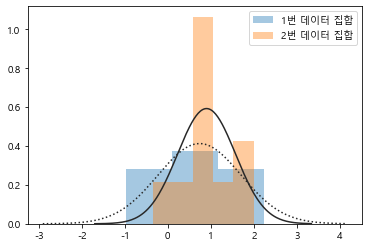

In [29]:
N_1, mu_1, sigma_1 = 10, 0, 1
N_2, mu_2, sigma_2 = 10, 0.5, 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [30]:
np.mean(x1), np.mean(x2)

(0.7380231707288347, 0.9006460151624349)

In [31]:
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-0.4139968526988655, pvalue=0.6843504889824326)

In [32]:
N_1, mu_1, sigma_1 = 50, 0, 1
N_2, mu_2, sigma_2 = 100, 0.5, 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-2.5427747064864556, pvalue=0.012800307550312669)

In [56]:
# 연습 문제 9.5.6
l1 = '80점, 75점, 85점, 50점, 60점, 75점, 45점, 70점, 90점, 95점, 85점, 80'.split('점, ')
l2 = '80점, 85점, 70점, 80점, 35점, 55점, 80'.split('점, ')
x1 = np.array(list(map(int, l1)))
x2 = np.array(list(map(int, l2)))
np.mean(x1), np.mean(x2)

(74.16666666666667, 69.28571428571429)

In [57]:
sp.stats.shapiro(x1), sp.stats.shapiro(x2)

((0.9288562536239624, 0.3681465983390808),
 (0.8173714876174927, 0.060575928539037704))

In [37]:
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=0.596519621317167, pvalue=0.562790180213766)

- 대응표본 t검정(paired-t test)

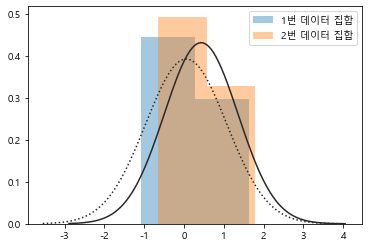

In [38]:
N = 5
mu_1 = 0
mu_2 = 0.4
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [39]:
sp.stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-5.662482449248929, pvalue=0.0047953456833781305)

- 등분산 검정

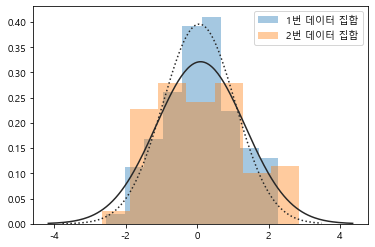

In [40]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [42]:
x1.std(), x2.std()

(1.0078822447165796, 1.2416003969261071)

In [43]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.253473837232266, pvalue=0.039170128783651344)

In [44]:
sp.stats.fligner(x1, x2), sp.stats.levene(x1, x2)

(FlignerResult(statistic=7.224841990409457, pvalue=0.007190150106748367),
 LeveneResult(statistic=7.680708947679437, pvalue=0.0061135154970207925))

- 정규성 검정

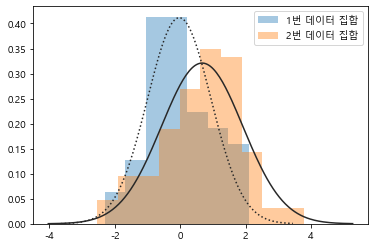

In [49]:
np.random.seed(1)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [50]:
sp.stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.33, pvalue=0.0011968387406930958)

In [52]:
sp.stats.shapiro(x1), sp.stats.shapiro(x2)

((0.9704717993736267, 0.24187636375427246),
 (0.9873075485229492, 0.45863381028175354))